In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import tensorflow
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import models, layers

import numpy as np
import os 
import glob
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split


In [2]:
path=r"C:\Users\shdgh\Downloads\archive (1)\Face Mask Dataset"

In [3]:
train_dir=r"C:\Users\shdgh\Downloads\archive (1)\Face Mask Dataset\Train"
test_dir=r"C:\Users\shdgh\Downloads\archive (1)\Face Mask Dataset\test"
val_dir=r"C:\Users\shdgh\Downloads\archive (1)\Face Mask Dataset\Validation"
mask_train_dir=r"C:\Users\shdgh\Downloads\archive (1)\Face Mask Dataset\Train\WithMask"
no_mask_train_dir=r"C:\Users\shdgh\Downloads\archive (1)\Face Mask Dataset\Train\WithoutMask"
mask_valid_dir=r"C:\Users\shdgh\Downloads\archive (1)\Face Mask Dataset\Validation\WithMask"
no_mask_valid_dir=r"C:\Users\shdgh\Downloads\archive (1)\Face Mask Dataset\Validation\WithoutMask"
mask_test_dir=r"C:\Users\shdgh\Downloads\archive (1)\Face Mask Dataset\Test\WithMask"
no_mask_test_dir=r"C:\Users\shdgh\Downloads\archive (1)\Face Mask Dataset\Test\WithoutMask"
dirlist=[mask_train_dir, no_mask_train_dir, mask_valid_dir, no_mask_valid_dir, mask_test_dir, no_mask_test_dir]
classes=['mask', 'no_mask', 'mask', 'no_mask', 'mask', 'no_mask']
filepaths=[]
labels=[]
for d,c in zip(dirlist, classes): #loop inside the directories (folders) 
    flist=os.listdir(d) #file
    for f in flist:
        fpath=os.path.join (d,f) 
        filepaths.append(fpath) #add file paths - pictures
        labels.append(c)  #add labels - no mask / mask on
print ('filepaths: ', len(filepaths), '   labels: ', len(labels)) 

filepaths:  11792    labels:  11792


In [4]:
Fseries=pd.Series(filepaths, name='file_paths') #create a series to contains pics and labels 
Lseries=pd.Series(labels, name='labels') 
df=pd.concat([Fseries,Lseries], axis=1)   #Concatenate the two series 
df=pd.DataFrame(np.array(df).reshape(11792,2), columns = ['file_paths', 'labels'])#reshape 11792 row ,2 cols
print(df['labels'].value_counts()) #show the number of the labels in the df 

no_mask    5909
mask       5883
Name: labels, dtype: int64


In [ ]:
train_df, test_df=train_test_split(df, train_size=0.95, shuffle=True)
train_df, valid_df=train_test_split(train_df, train_size=0.9, shuffle=True)

## Image Examples

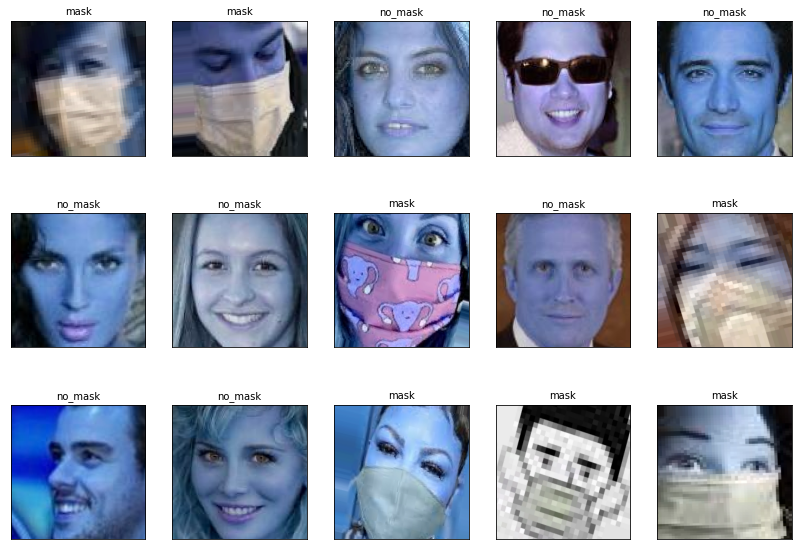

In [5]:
plt.figure(figsize=(14,10))
for i in range(15): #show only 15 images randomly from the df 
    random = np.random.randint(1,len(df)) 
    plt.subplot(3,5,i+1) #plot 3 rows 5 cols
    plt.imshow(cv2.imread(df.loc[random,"file_paths"])) #read the images from this dataframe--> filepath
    plt.title(df.loc[random, "labels"], size = 10, color = "black") #show labels with the images
    plt.xticks([]) #to removethe current tick locations and labels of the x-axis.
    plt.yticks([])#to removethe current tick locations and labels of the y-axis.
    
plt.show()

### DATA PROCESSING / IMAGE PROCESSING

In [7]:

target_size=(96,96) #size of all images 96 x 96 pixels
batch_size = 16 

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size, 
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=True, 
    seed=42,
    class_mode='categorical') #problem type

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,    
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb', 
    shuffle=False,    
    class_mode='categorical')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [11]:
train_df, test_df=train_test_split(df, train_size=0.95, shuffle=True)
train_df, valid_df=train_test_split(train_df, train_size=0.9, shuffle=True)

In [12]:
print(train_df.labels.value_counts())
print(valid_df.labels.value_counts())
print(test_df.labels.value_counts())

no_mask    5073
mask       5008
Name: labels, dtype: int64
mask       564
no_mask    557
Name: labels, dtype: int64
mask       311
no_mask    279
Name: labels, dtype: int64


## Bulied the Model

In [13]:
num_classes = 2 # WithMask, WithoutMask
input_shape = (96,96,3)
# Build Model
model = models.Sequential()
# 1st Conv layer
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(96, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dense(64))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 96, 96, 16)        448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 96)       

In [14]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input, zoom_range=0.2, rotation_range=40)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)
train_gen = train_datagen.flow_from_dataframe(train_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
valid_gen = test_datagen.flow_from_dataframe(valid_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')

Found 10081 validated image filenames belonging to 2 classes.
Found 1121 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [15]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='Adam',  metrics=['accuracy'])

In [17]:
#train - setting values 

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size
num_epochs = 15

In [18]:
model.fit_generator(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,epochs=num_epochs, validation_data=valid_generator, validation_steps=STEP_SIZE_VALID) #, callbacks=[checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
625/625 [==============================] - 94s 150ms/step - loss: 0.2964 - accuracy: 0.8785 - val_loss: 0.1752 - val_accuracy: 0.9400
Epoch 2/15
625/625 [==============================] - 81s 130ms/step - loss: 0.2222 - accuracy: 0.9169 - val_loss: 0.1945 - val_accuracy: 0.9337
Epoch 3/15
625/625 [==============================] - 86s 137ms/step - loss: 0.2129 - accuracy: 0.9229 - val_loss: 0.1846 - val_accuracy: 0.9312
Epoch 4/15
625/625 [==============================] - 83s 133ms/step - loss: 0.1977 - accuracy: 0.9273 - val_loss: 0.1446 - val_accuracy: 0.9450
Epoch 5/15
625/625 [==============================] - 79s 126ms/step - loss: 0.1869 - accuracy: 0.9308 - val_loss: 0.1394 - val_accuracy: 0.9550
Epoch 6/15
625/625 [==============================] - 78s 126ms/step - loss: 0.1730 - accuracy: 0.9347 - val_loss: 0.0958 - val_accuracy: 0.9675
Epoch 7/15
625/625 [==============================] - 

In [19]:
models.save_model(model, "Face-mask-detection-f.h5") # save the model

In [20]:
score = model.evaluate(test_generator, steps=STEP_SIZE_TEST)
print(score)

62/62 [==============================] - 3s 49ms/step - loss: 0.0468 - accuracy: 0.9839
[0.046799734234809875, 0.9838709831237793]


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
pred_y=model.predict(test_generator)
pred = np.argmax(pred_y,axis=1)

y_actual = test_generator.classes
cm = confusion_matrix(y_actual, pred)
print(cm)

[[472  11]
 [  5 504]]


In [23]:
labels = ['withMask', 'withoutMask']
print(classification_report(y_actual, pred, target_names=labels))

              precision    recall  f1-score   support

    withMask       0.99      0.98      0.98       483
 withoutMask       0.98      0.99      0.98       509

    accuracy                           0.98       992
   macro avg       0.98      0.98      0.98       992
weighted avg       0.98      0.98      0.98       992

